# BAGGING, BOOSTING AND PRUNING

Author: Gauri Verma

# Bagging

In [1]:
from random import seed
from random import random
from random import randrange

In [2]:
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio=1.0):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample

In [22]:
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers) / float(len(numbers))

In [28]:
seed(1)
# True mean
dataset = [[randrange(10)] for i in range(20)]
print('True Mean: %.3f' % mean([row[0] for row in dataset]))
# Estimated means
ratio = 0.10
for size in [1, 10, 100]:
    sample_means = list()
    for i in range(size):
        sample = subsample(dataset, ratio)
        sample_mean = mean([row[0] for row in sample])
        sample_means.append(sample_mean)
    print('Samples=%d, Estimated Mean: %.3f' % (size, mean(sample_means)))

True Mean: 4.500
Samples=1, Estimated Mean: 4.000
Samples=10, Estimated Mean: 4.700
Samples=100, Estimated Mean: 4.570


# Pruning

In [50]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df = df.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'target']]

In [49]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
# Separate X and y data
X = df.drop('target', axis=1)
y = df.target

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 45)

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 40)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [60]:
print(accuracy_score(y_train,y_train_pred),round(accuracy_score(y_test,y_test_pred),2))


0.95 0.63


DecisionTree in sklearn has a function called cost_complexity_pruning_path, which gives the effective alphas of subtrees during pruning and also the corresponding impurities. In other words, we can use these values of alpha to prune our decision tree

In [55]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']
#ccp_alphas - Effective alphas of subtree during pruning.
alphas

array([0.        , 0.00277778, 0.00277778, 0.00277778, 0.00324074,
       0.00518519, 0.00555556, 0.00694444, 0.00743464, 0.01006944,
       0.01041667, 0.01161038, 0.01230159, 0.01581699, 0.02010944,
       0.05683866, 0.06089286, 0.20756944])

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np

We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.

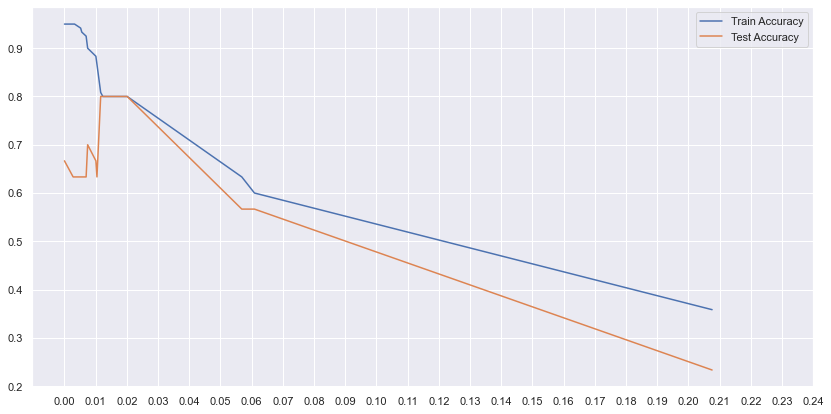

In [63]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

We can see that between alpha=0.01 and 0.02, we get the maximum test accuracy. Although our train accuracy has decreased to 0.8, our model is now more generalized and it will perform better on unseen data.

In [64]:
tree = DecisionTreeClassifier(ccp_alpha=0.02,random_state=40)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.8 0.8


In [4]:
# pros cons, overfitting underfitting, bias variance tradeoff, precision recall, oversampling undersampling, 
# what if only sum of squared errors keeps decreasing and we take that 
# relation with pruning
# logistic reg with regularization
# how to overcome under/overfitting
# metric if machine is predicting incorrectly at high/low confidence ( precision/recall)
# type1 type 2 error

# bagging boosting examples
# gradient better examples